In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the dataset
data = pd.read_csv('student_data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
data.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

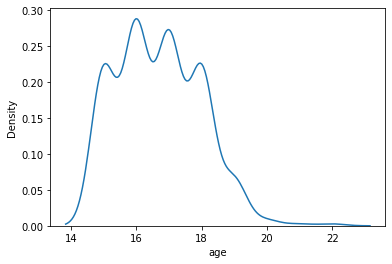

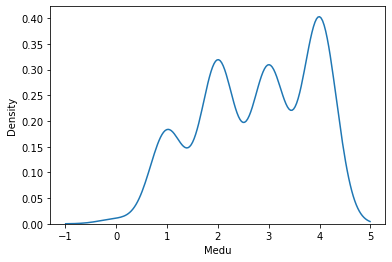

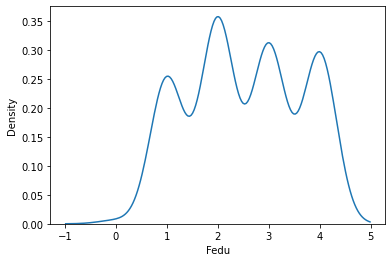

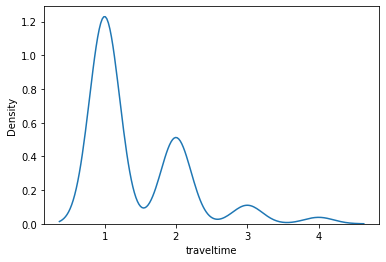

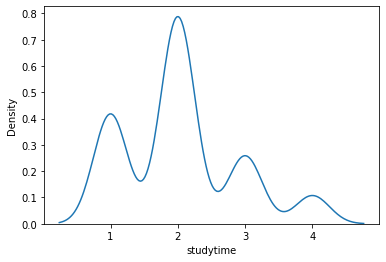

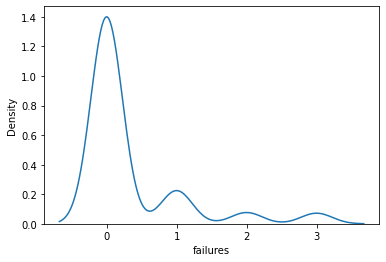

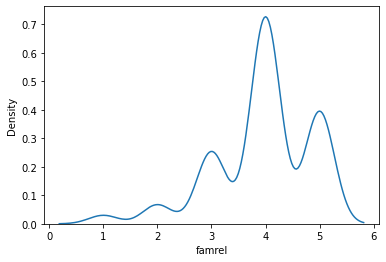

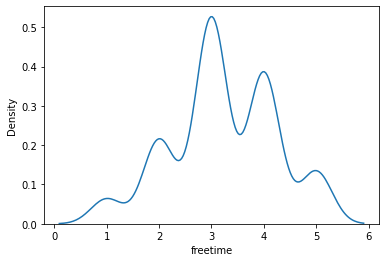

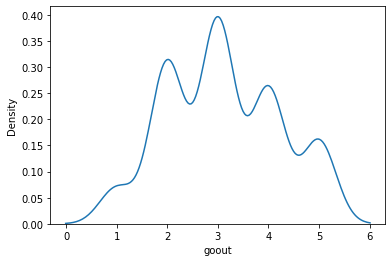

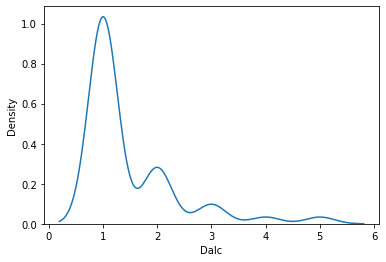

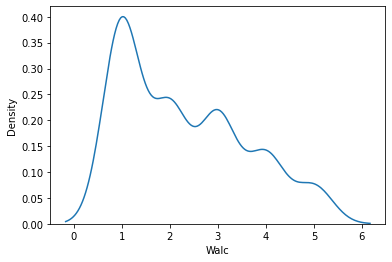

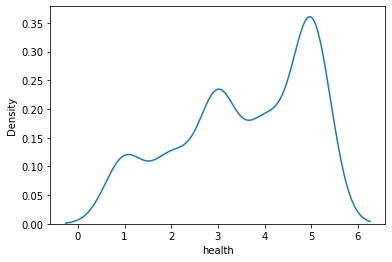

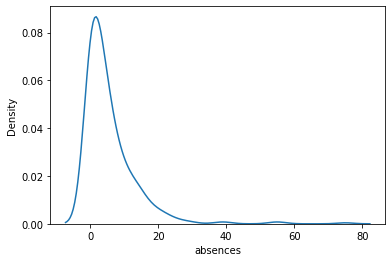

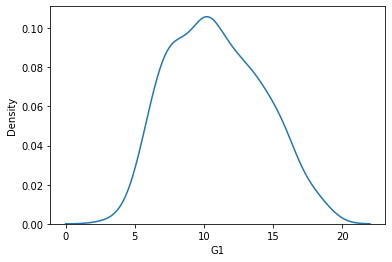

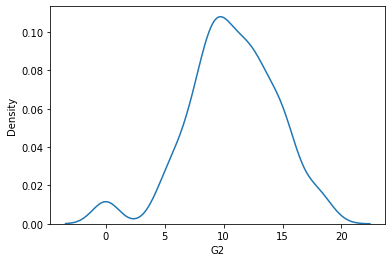

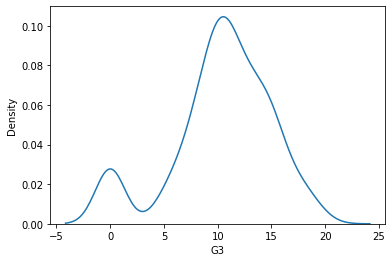

In [7]:
# checking for outliers
for feature in data.select_dtypes(include='number'):
    sns.kdeplot(x=feature, data=data)
    plt.show()

<AxesSubplot:>

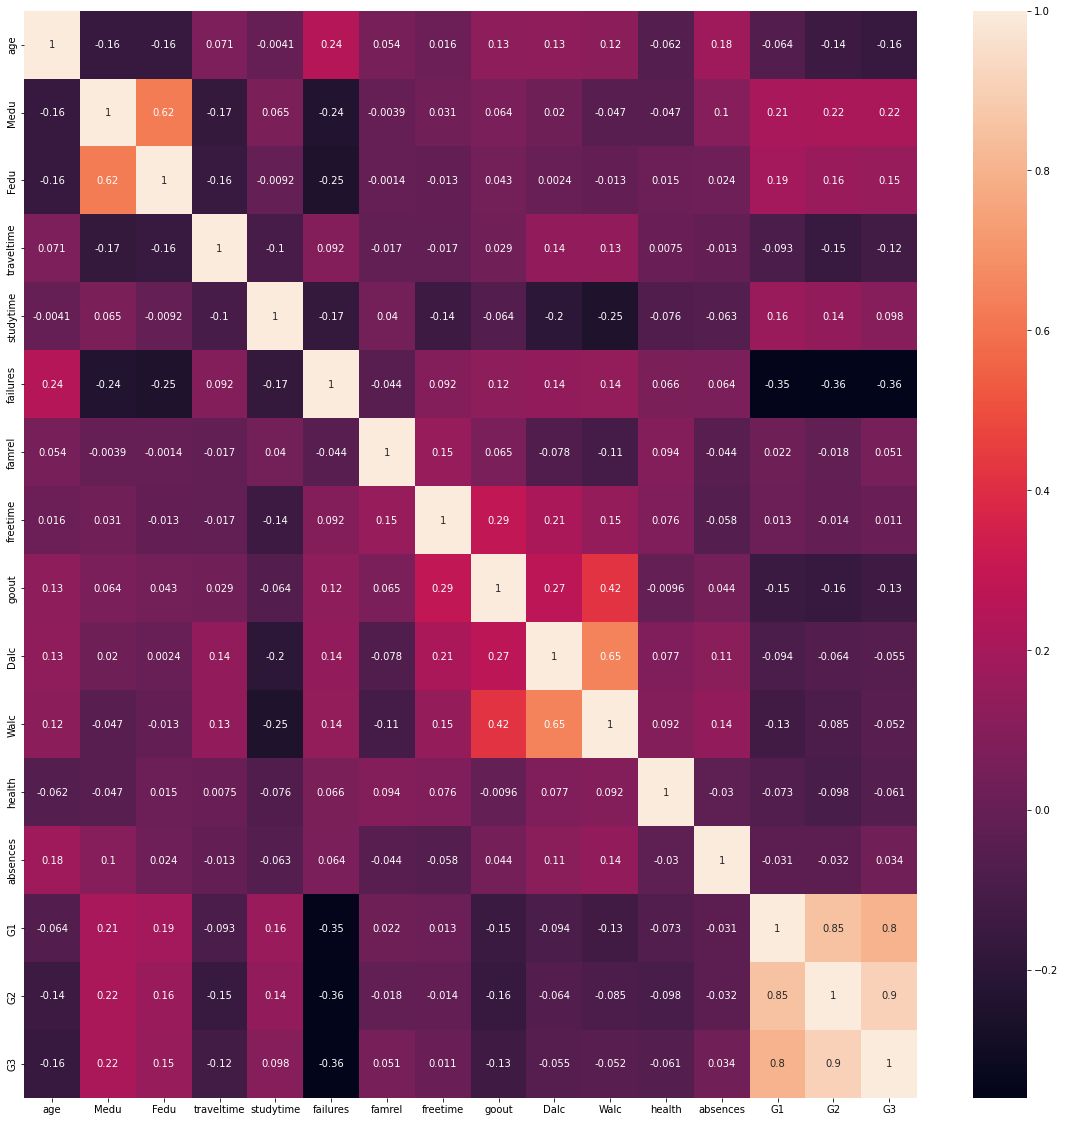

In [8]:
#Correlation matrix
plt.figure(figsize=(20, 20))
correlation = data.corr()
sns.heatmap(correlation, annot=True)

Normalizing the data

In [9]:
# copying the data into a new dataframe
data_copy = data.copy()
data_copy.select_dtypes(include='object').columns
    

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [10]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
for col in data_copy.select_dtypes(include='object').columns:
    data_copy[col] = ohe.fit_transform(data_copy[[col]]).toarray()

data_scaled = data_copy.copy()

In [11]:
data_scaled.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.0,1.0,18,0.0,1.0,1.0,4,4,1.0,0.0,...,4,3,4,1,1,3,6,5,6,6
1,1.0,1.0,17,0.0,1.0,0.0,1,1,1.0,0.0,...,5,3,3,1,1,3,4,5,5,6
2,1.0,1.0,15,0.0,0.0,0.0,1,1,1.0,0.0,...,4,3,2,2,3,3,10,7,8,10
3,1.0,1.0,15,0.0,1.0,0.0,4,2,0.0,0.0,...,3,2,2,1,1,5,2,15,14,15
4,1.0,1.0,16,0.0,1.0,0.0,3,3,0.0,0.0,...,4,3,2,1,2,5,4,6,10,10


Feature Selection

In [12]:
# Copying the scaled data into a new dataframe
data_scaled_copy = data_scaled.copy()
data_scaled_copy.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

In [13]:
# variance threshold
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.1)

In [14]:
#fitting the data
vt.fit(data_scaled_copy)

VarianceThreshold(threshold=0.1)

In [15]:
vt.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [16]:
data_scaled_copy.columns[vt.get_support()]

Index(['school', 'sex', 'age', 'address', 'famsize', 'Medu', 'Fedu', 'Mjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences'],
      dtype='object')

In [17]:
# dropping the columns with low variance
feature_to_drop = [col for col in data_scaled_copy.columns if col not in data_scaled_copy.columns[vt.get_support()]]
feature_to_drop

['Pstatus', 'Fjob', 'higher']

In [18]:
data_scaled.drop(feature_to_drop, axis=1, inplace=True)
data_scaled.head()

,school,sex,age,address,famsize,Medu,Fedu,Mjob,reason,guardian,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.0,1.0,18,0.0,1.0,4,4,1.0,1.0,0.0,...,4,3,4,1,1,3,6,5,6,6
1,1.0,1.0,17,0.0,1.0,1,1,1.0,1.0,1.0,...,5,3,3,1,1,3,4,5,5,6
2,1.0,1.0,15,0.0,0.0,1,1,1.0,0.0,0.0,...,4,3,2,2,3,3,10,7,8,10
3,1.0,1.0,15,0.0,1.0,4,2,0.0,0.0,0.0,...,3,2,2,1,1,5,2,15,14,15
4,1.0,1.0,16,0.0,1.0,3,3,0.0,0.0,1.0,...,4,3,2,1,2,5,4,6,10,10


<AxesSubplot:>

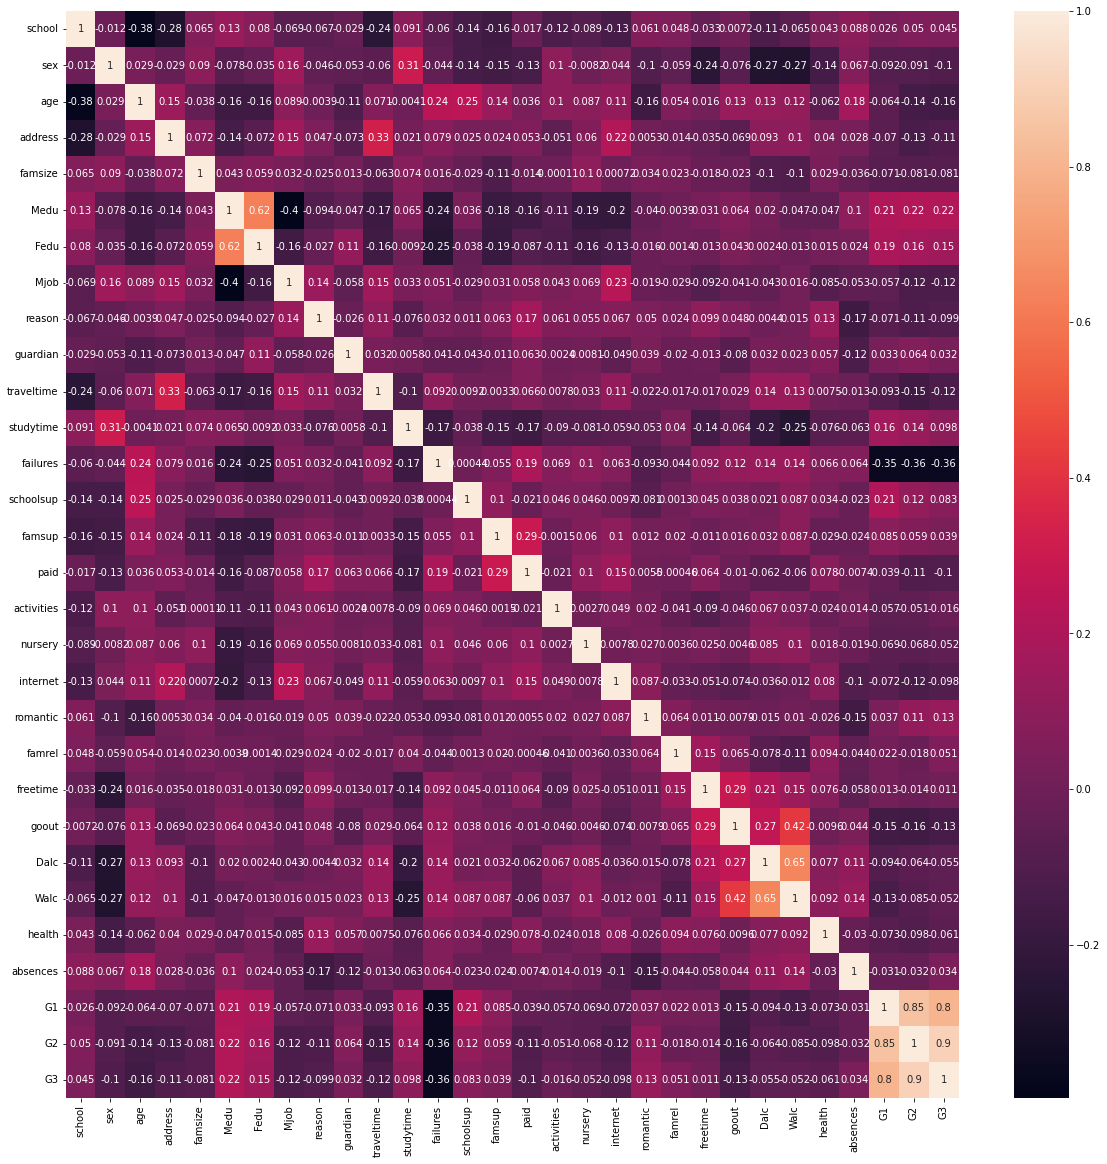

In [19]:
#checking the new correlation matrix
plt.figure(figsize=(20, 20))
corrernation = data_scaled.corr()
sns.heatmap(corrernation, annot=True)

In [20]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
y = data_scaled['G3']
X = data_scaled.drop(['G3'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Regression

In [21]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [22]:
lr.score(X_test, y_test)

0.870150494377229

In [23]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
rf.score(X_test, y_test)

0.9027038384863211

In [25]:
# Support Vector Regressor
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [26]:
svr.score(X_test, y_test)

0.8523949550040937

In [27]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [28]:
knn.score(X_test, y_test)

0.8758914935654403

Minimum error:- 0.7341772151898734 at K = 0


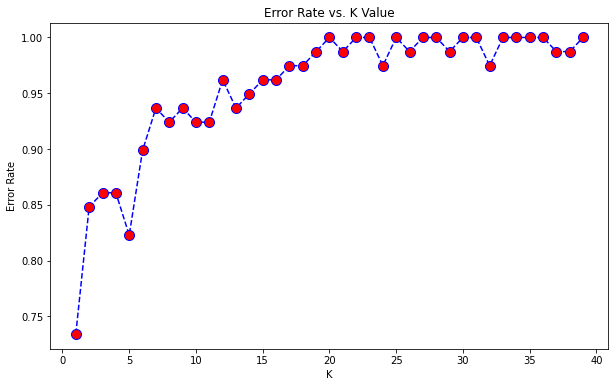

In [29]:
from sklearn.neighbors import KNeighborsRegressor
error_rate = []
for i in range(1,40):
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [30]:
knn = KNeighborsRegressor(n_neighbors=error_rate.index(min(error_rate))+1)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [31]:
knn.score(X_test, y_test)

0.7855591748099892

Classification

In [32]:

data_scaled['G3'].describe()


count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [33]:
#binninng G3
def binningfunc(col,cut_points,labels):
    minval = col.min()
    maxval = col.max()
    break_points = [minval] + cut_points + [maxval]
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

In [34]:
#normalize
data_scaled['G3'] = (data_scaled['G3'] - data_scaled['G3'].min()) / (data_scaled['G3'].max() - data_scaled['G3'].min())

In [35]:
cut_points = [0.2, 0.4, 0.6, 0.8]  # max values of each bin
labels = ["F", "D", "C", "B", "A"] # labels for each bin
data_scaled["G3"] = binningfunc(data_scaled["G3"], cut_points, labels)

In [36]:
data_scaled['G3'].value_counts()

C    162
B    107
D     63
F     39
A     24
Name: G3, dtype: int64

In [37]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
y = data_scaled['G3']
X = data_scaled.drop(['G3'], axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2)

In [38]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train1, y_train1)

KNeighborsClassifier()

In [39]:
knn.score(X_test1, y_test1)

0.7341772151898734

In [40]:
# Support Vector Classifier
from sklearn.svm import SVC
svr = SVC()
svr.fit(X_train1, y_train1)

SVC()

In [41]:
svr.score(X_test1, y_test1)

0.6835443037974683

In [42]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train1, y_train1)


RandomForestClassifier()

In [43]:
rf.score(X_test1, y_test1)

0.8227848101265823

In [44]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train1, y_train1)

GaussianNB()

In [45]:
gnb.score(X_test1, y_test1)

0.6962025316455697

In [46]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train1, y_train1)

LinearDiscriminantAnalysis()

In [47]:
lda.score(X_test1, y_test1)

0.6962025316455697

Minimum error:- 0.21518987341772153 at K = 8


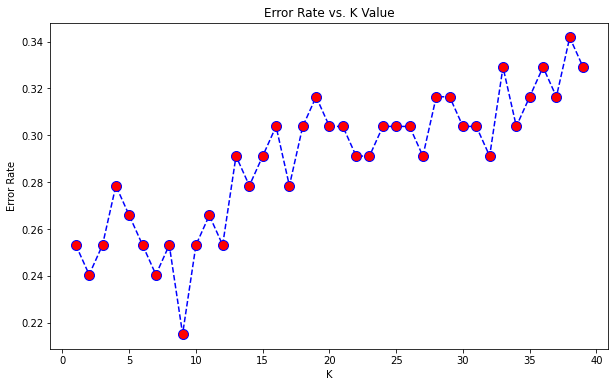

In [48]:
# finding the best k
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train1,y_train1)
 pred_i = knn.predict(X_test1)
 error_rate.append(np.mean(pred_i != y_test1))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [49]:
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate))+1)
knn.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=9)

In [50]:
knn.score(X_test1, y_test1)

0.7848101265822784

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train1, y_train1)


GradientBoostingClassifier()

In [53]:
gb.score(X_test1, y_test1)

0.8227848101265823